## Messing About with Genetic Algorithms...

* Today's lecture is ostensibly about genetic algorithms but actually its more about me messing about with OBS + Jupyter Notebook. Get some experience making videos in this style because my beginners guide is almost ready... you should totally check that our on github.

    https://github.com/fluffy-hamster/A-Beginners-Guide-to-Python
    
* Basically, I'm trying to experiment with various formats and style for programming videos. So yeah... if you want to give me feedback regarding the format just hola at me, fam. :)

## What are Genetic Algorithms?

Basically its about applying some of the principles of evolution to computers. 

1. Generate a random population (large populations = more 'genetic' diversity)
1. Create a 'fitness function'. That is, a function knows who the fittest individuals in a population are.
1. Have two parents make a child! Said child inherits its "genes" from both parents (crossover, natural selection).
1. Have a small chance of mutation.
1. Repeat steps above over 1000's of iterations. Watch as our baby little programs 'evolve' over time

The plan today is to write a  genetic algorithm capable of solving the Eight Queens puzzle. 

## Pseudo Code:

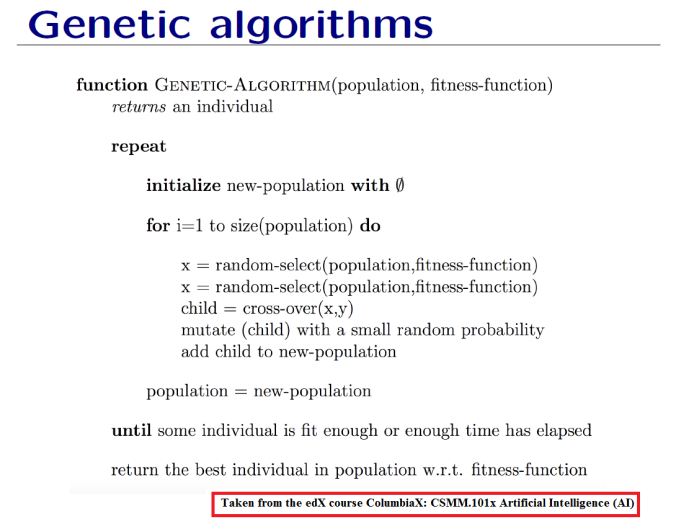

    https://www.edx.org/course/artificial-intelligence-ai-columbiax-csmm-101x-0

## The Eight Queens Puzzle...

The Eight Queens puzzle is simply this:
1. Take a normal 8x8 chessboard
1. Take a normal chess queen.
1. Position 8 queens such that no queen can capture any other.

It turns out there are several solutions to this puzzle, you can see four of which in the graphic directly below. 

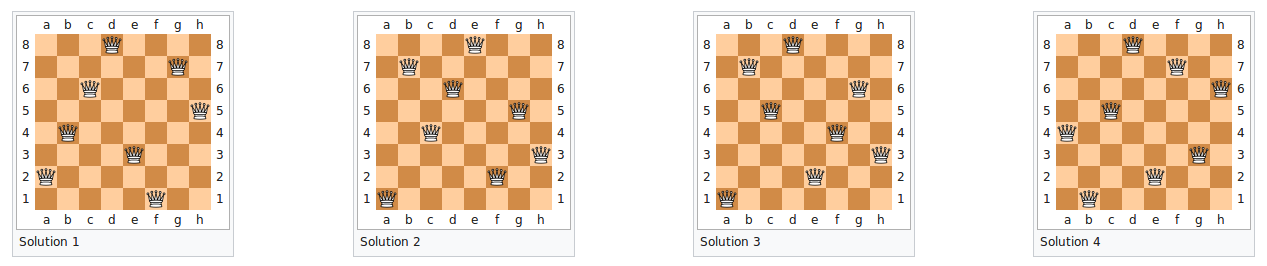

I spent most of yesterday writing some janky code to try and solve this problem (with genetic algorithms).

## How Selection Works...

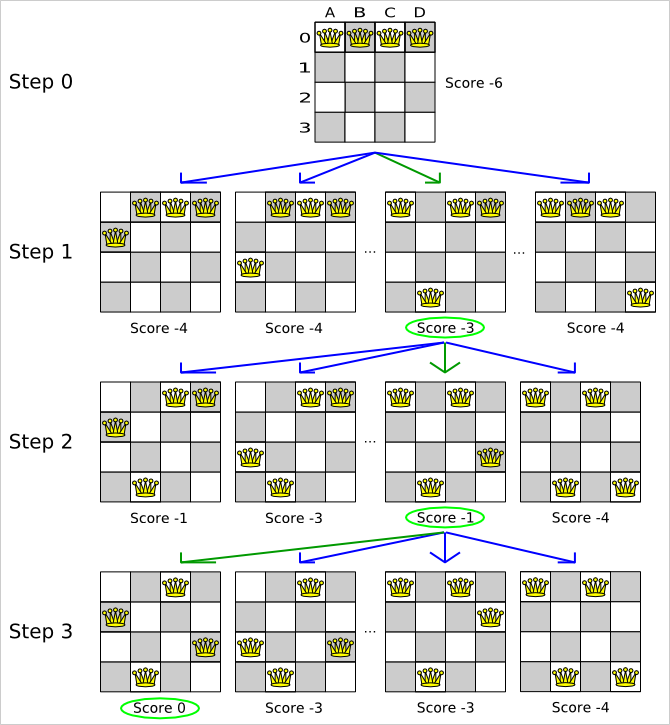

## Mutation and Crossover...

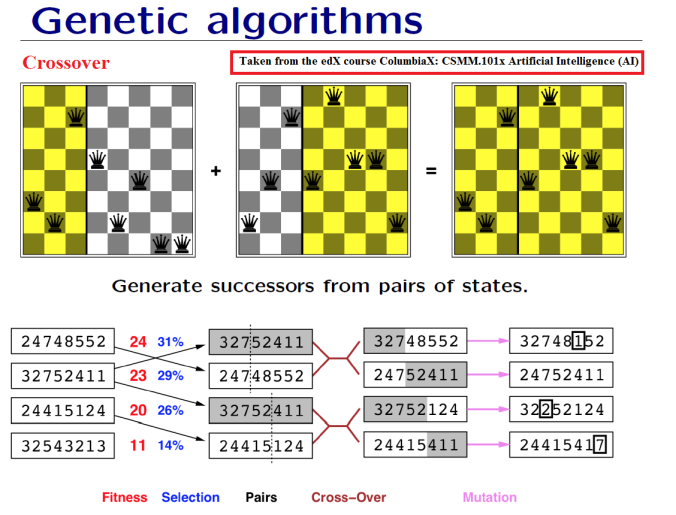

## And now for my Terrible Code...

Yes, my code is horrible -- its janky as fuck and just barely runs. But hey, everyone suck when they are new...

In [1]:
import random

class Board(object):
    """Returns a nested list of NxN size.

    >>> a = Board(2)
    >>> a._board
    [['_', '_'], ['_', '_']]

    >>> q = Board(8)
    >>> q.p()
    0| ['_', '_', '_', '_', '_', '_', '_', '_']
    1| ['_', '_', '_', '_', '_', '_', '_', '_']
    2| ['_', '_', '_', '_', '_', '_', '_', '_']
    3| ['_', '_', '_', '_', '_', '_', '_', '_']
    4| ['_', '_', '_', '_', '_', '_', '_', '_']
    5| ['_', '_', '_', '_', '_', '_', '_', '_']
    6| ['_', '_', '_', '_', '_', '_', '_', '_']
    7| ['_', '_', '_', '_', '_', '_', '_', '_']
     |________________________________________|
       | 0|  |1|  |2|  |3|  |4|  |5|  |6|  |7 |
    <BLANKLINE>
    >>> q = Board(8)
    >>> q.place_queen("Q", 0, 0)
    >>> q.place_queen("W", 0, 1)
    >>> q.place_queen("E", 0, 2)
    >>> q.place_queen("R", 0, 3)
    >>> q.place_queen("T", 0, 4)
    >>> q.place_queen("Y", 0, 5)
    >>> q._board[:2]
    [['Q', 'W', 'E', 'R', 'T', 'Y', '_', '_'], ['_', '_', '_', '_', '_', '_', '_', '_']]
    >>> q.place_queen("Q", 7, 7)
    >>> q.place_queen("Q", 6, 6)
    >>> q.place_queen("Q", 5, 5)
    >>> q.p()
    0| ['Q', 'W', 'E', 'R', 'T', 'Y', '_', '_']
    1| ['_', '_', '_', '_', '_', '_', '_', '_']
    2| ['_', '_', '_', '_', '_', '_', '_', '_']
    3| ['_', '_', '_', '_', '_', '_', '_', '_']
    4| ['_', '_', '_', '_', '_', '_', '_', '_']
    5| ['_', '_', '_', '_', '_', 'Q', '_', '_']
    6| ['_', '_', '_', '_', '_', '_', 'Q', '_']
    7| ['_', '_', '_', '_', '_', '_', '_', 'Q']
     |________________________________________|
       | 0|  |1|  |2|  |3|  |4|  |5|  |6|  |7 |
    <BLANKLINE>
    """

    def __init__(self, n):
        self._board = [["_" for i in range(n)] for i in range(n)]
        self._n = n

    def p(self):
        """prints the board, with corordinates on the side."""
        
        s = "01234567"
        for i in range(len(self._board)):
            print("{}| {}".format(s[i], self._board[i]))
        print(" |________________________________________|")
        print("   | {}|  |{}|  |{}|  |{}|  |{}|  |{}|  |{}|  |{} |\n".format(*s))

    def place_queen(self, queen, x, y):
        """
        Takes an x,y position, and puts a mark (queen) on that square

        queen --> str (ideally a single character).
        x,y --> int (should be in range 0 to size of the board.
        """
        try:
            self._board[x][y] = queen
        except IndexError:
            print("INDEX ERROR: ({},{})".format(x,y)) 

def show_board(queens):
    """takes a list/set of tuples, where each tuple is the position of a queen.
    Builds a board using Board class and calls the print method.

    >>> show_board({(i,i) for i in range(8)})
    0| ['Q', '_', '_', '_', '_', '_', '_', '_']
    1| ['_', 'Q', '_', '_', '_', '_', '_', '_']
    2| ['_', '_', 'Q', '_', '_', '_', '_', '_']
    3| ['_', '_', '_', 'Q', '_', '_', '_', '_']
    4| ['_', '_', '_', '_', 'Q', '_', '_', '_']
    5| ['_', '_', '_', '_', '_', 'Q', '_', '_']
    6| ['_', '_', '_', '_', '_', '_', 'Q', '_']
    7| ['_', '_', '_', '_', '_', '_', '_', 'Q']
     |________________________________________|
       | 0|  |1|  |2|  |3|  |4|  |5|  |6|  |7 |
    <BLANKLINE>
    """
    board = Board(8)
    for x, y in queens:
        board.place_queen("Q", x, y)         

    return board.p()

def queen_movement(x, y, distance):
    """Takes a position (x, y) and a distance.
    Returns all possible Queen moves up to distance.
    x, y should be in range(0, distance)."""
    
    assert 0 <= x < distance and 0 <= y < distance, "Invalid input"

    moves = set()
    for n in range(1, distance):
        offsets = [(x + n, y + n),  ## diagonals
                   (x - n, y - n),
                   (x - n, y + n),
                   (x + n, y - n), 

                   (x - n, y),  ## othagonal
                   (x + n, y),
                   (x, y + n),
                   (x, y - n)]

        for xy in offsets:
            if min(xy) >= 0 and max(xy) <= distance -1:  ## -1 because we index at 0.
                moves.add(xy)
    return moves


def master_set(n, q=8):
    """n -->  int, size of the board.
    Master set returns a dict where:
    key = tuple, x,y (where x, y represent a cordinate on a NxN board.)
    value = set, all possible queen moves from postion (key).

    q = distance we call queen with (used for testing).
    """
    master = {}
    for i in range(n):
       for j in range(n):
           key= (i, j)

           master[key] = queen_movement(i, j, q)

    Emsg = "length of dict is {}, should equal {}".format(len(master), n*n)
    assert len(master) == n*n, Emsg
    return master

def fitness_function(queens, master):
    """ queens = set of (x, y) tuples, representing queen position.
    master = a dictionary created by the master_set function.
    The function returns score --> int. Best possible score is 0 (lower means better). 

    score is calculated by taking the queens' positions
    and figuring out how many other queens can "capture" that queen.

    >>> m = master_set(8)
    >>> fitness_function({(4,0), (0,1), (7,2), (5,3), (2,4), (6,5), (1,6), (3, 7)}, m)
    0
    >>> fitness_function({(0,i) for i in range(8)}, m)
    56
    """
    assert len(queens) == 8, "Error, {} is incorrect number of queens.".format(len(queens))
    
    list_of_sets = [master[i] for i in queens]
    collisions = []
    for q in list_of_sets:
        collisions.extend(queens.intersection(q))
    return len(collisions)

###################### GENETIC EVOLUTION FUNCTIONS ########################################
def generate_pop(n=50):
    """ Function appends 'n' individuals to the list 'population'.
    Each individual is a set of randomly generated (x,y) tuples (length 8)

    >>> random.seed(5)
    >>> generate_pop(2)
    [{(1, 3), (4, 5), (3, 0), (5, 7), (2, 1), (0, 7), (3, 6), (0, 3)}, {(2, 7), (6, 4), (2, 6), (0, 0), (3, 3), (4, 5), (2, 1), (2, 2)}]
    """
    population = []

    while len(population) != n:
        queens = set()
        while len(queens) != 8:
            xy = (random.choice(range(0,8)), random.choice(range(0,8)))
            queens.add(xy)
        population.append(queens)

    return population
    
def mutate(individual, chance):
    """
    individual = 8 length set of (x,y) tuples
    chance --> float, probability of mutating.

    >>> random.seed(50)
    >>> mutate({(2, 7), (4, 7), (7, 4), (7, 5), (1, 6), (6, 2), (1, 7), (5, 2)}, 0.5)
    {(2, 7), (4, 7), (7, 4), (6, 3), (7, 5), (1, 6), (1, 7), (5, 2)}
    >>> mutate({(2, 7), (4, 7), (7, 4), (7, 5), (1, 6), (6, 2), (1, 7), (5, 2)}, 0.5)
    {(2, 7), (4, 7), (7, 4), (7, 5), (6, 2), (1, 6), (1, 7), (5, 2)}
    """
    if random.random() < chance:
        
        # choose a (x,y) tuple from individual at random
        x = random.sample(individual,1)[0]
        # pick x or y to mutate
        y = random.choice([0,1])
        z = 1 if y == 0 else 0
        # new value for (x xor y):
        new = random.choice(range(0, 8))
        # create new tuple, with mutation:
        a = [0,0]
        a[z] = x[z]
        a[y] = new

        if tuple(a) in individual:
            mutate(individual, 1)

        else:

            individual.remove(x)
            individual.add(tuple(a))

        assert len(individual) == 8, "FUUUUUU"
        
    return individual

def crossover(parent_1, parent_2):
    """ crossover takes two parents and returns a child.
    parent --> set of (x,y) tuples
    child  --> set of (x,y) tuples (inherited from both parents).
    """
    x = random.choice(range(1,8))
    y = 8 - x
    assert x + y == 8

    # take x 'genes' from parent 1, y 'genes' from parent 2.
    s1 = random.sample(parent_1, x)
    s2 = random.sample(parent_2, y)

    child = set(s1).union(s2)
    #print(len(child), child, s1, s2, sep="\n")

    # If we dont have 8 queens, we add some tuples...
    if len(child) != 8:     
        set_ = parent_2.union(parent_1)
        for xy in set_:
            if xy not in child:
                child.add(xy)
                if len(child) == 8:
                    break             
    return child

                
class Best_2_Individuals(object):

    def __init__(self):
        self.score = [float('inf'), float('inf')]
        self.individuals = ["A", "B"]

    def compare(self, score, individual):
        if score < self.score[0] or score < self.score[1]:

            if max(self.score) == self.score[0]:
                self.score[0] = score
                self.individuals[0] = individual

            else:
                self.score[1] = score
                self.individuals[1] = individual

    def best_individual(self):
        if min(self.score) == self.score[0]:
            return self.individuals[0]
        else:
            return self.individuals[1]

def single_iteration(population):

    best_found = Best_2_Individuals()
    
    for individual in population:
        score = fitness_function(individual, MASTER)

        best_found.compare(score, individual)

        #print(best_found.individuals, best_found.score)
        
    child_1 = crossover(*best_found.individuals)
    child_2 = crossover(*best_found.individuals)
    child_1 = mutate(child_1, 0.70)
    child_2 = mutate(child_2, 0.70)

    # Elitism; checking we do not erase the best scoring parents...
    switch = False
    for i in range(len(population)-1, 0, -1):
        if not switch:
            if population[i] not in best_found.individuals:
                population[i] = child_1
                switch = True
        if population[i] not in best_found.individuals:
            population[i] = child_2
            break

    return population, min(best_found.score), best_found.best_individual()

def run_simulation(n, steps=500):
    pop = generate_pop(n)

    iteration = 1
    best_score = [float('-inf')]
    fittest = [None]
    
    while iteration != steps and best_score[-1] != 0:

        p, s, i = single_iteration(pop)

        best_score.append(s)
        fittest.append(i)
        pop = p
        iteration += 1

    return iteration, best_score, fittest
   
############################# SETTING UP ... ##################################

MASTER = master_set(8)
starting_pop = generate_pop(10)        

The below function is simply used for graphing. How fancy!

In [25]:
import matplotlib.pyplot as plt

def plot(iterations, fitness):
    fig, ax = plt.subplots()
    ax.set_ylabel('Fitness Score')
    ax.set_xlabel('Iteration Count')
    ax.set_title('Fitness Over Time')
    plt.plot(iterations, fitness)
    ax.set_ylim(ymin=0)
    plt.show()

Alright so we have our function and the ability to make cute graphs. Lets try evolving some baby programs shall we!?

starting pop = 350
max iteration = 2000

Remember that the lower the score, the better. 

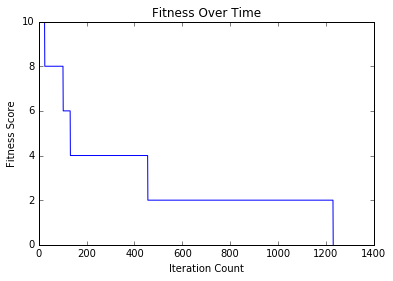

In [42]:
it, s, fit = run_simulation(350, 2000)

# Plotting...
it2 = list(range(1, it))
plot(it2, s[1:])

In [52]:
for i in range(1, it, 100):
    print("   ---- Iteration = {}, Score = {} ----  \n".format(i, s[i]))
    show_board(fit[i])
print(" ---- Iteration = {}, Score = {} ----  ".format(it, s[-1]))
show_board(fit[-1])


   ---- Iteration = 1, Score = 10 ----  

0| ['_', 'Q', '_', '_', '_', '_', '_', '_']
1| ['_', '_', '_', 'Q', '_', '_', '_', 'Q']
2| ['_', '_', '_', '_', '_', '_', '_', '_']
3| ['_', '_', '_', '_', 'Q', '_', 'Q', '_']
4| ['_', '_', 'Q', '_', '_', '_', '_', '_']
5| ['_', '_', '_', '_', '_', 'Q', '_', '_']
6| ['_', '_', '_', '_', '_', '_', '_', '_']
7| ['_', '_', 'Q', '_', '_', '_', '_', '_']
 |________________________________________|
   | 0|  |1|  |2|  |3|  |4|  |5|  |6|  |7 |

   ---- Iteration = 101, Score = 8 ----  

0| ['_', 'Q', '_', '_', '_', '_', '_', 'Q']
1| ['_', '_', '_', 'Q', '_', 'Q', '_', '_']
2| ['_', '_', '_', '_', '_', '_', '_', '_']
3| ['_', '_', '_', '_', '_', '_', 'Q', '_']
4| ['_', '_', 'Q', '_', '_', '_', '_', '_']
5| ['Q', '_', '_', '_', '_', '_', '_', '_']
6| ['_', '_', 'Q', '_', '_', '_', '_', '_']
7| ['_', '_', '_', '_', '_', '_', '_', '_']
 |________________________________________|
   | 0|  |1|  |2|  |3|  |4|  |5|  |6|  |7 |

   ---- Iteration = 201, Score = 